In [1]:
from scipy.optimize import minimize
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
rng = default_rng()
X = rng.random((100, 2))*20
Y = -((X[:,0]** + X[:,1] -11)**2+(X[:,0]+X[:,1]**-7)**2)

In [3]:
class Fun:
    def __init__(self):
        self.trajectory = []
    
    def __call__(self, x):
        z =  (x[0]**2)+(x[1]**2)
        self.trajectory.append(np.hstack((x, z)))
        return z
fun = Fun()
res = minimize(
    fun, 
    x0=[5,-4],
    bounds=[(-5,5),(-5,5)],
    # method="Nelder-Mead",
    # tol=0.1
)

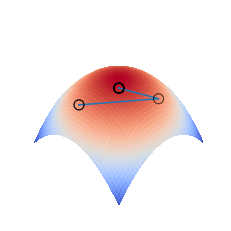

In [4]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d", "frameon": False})
fig = plt.figure(frameon=False)
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Make data.
X = np.arange(-10, 10 , 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
# Z = -((X**2 + Y - 11)**2+(X+Y**2-7)**2)
Z = -X**2 - Y**2 + 25

# Plot the surface.
traj = np.array(fun.trajectory)
ax.plot3D(
    traj[:,0],
    traj[:,1],
    -1.0*traj[:,2],
    zorder=4.3,
)
scat = ax.scatter3D(
    traj[:,0],
    traj[:,1],
    -1.0*traj[:,2],
    color="k",
    marker="o",
    s=100,
    zorder=4.4,
)

scat.set_facecolor('none')

surf = ax.plot_surface(
    X, 
    Y, 
    Z,
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
    zorder=4
    # alpha=0
)
traj = np.array(fun.trajectory)

plt.axis('off')

# Customize the z axis.
ax.set_xlabel("X")
ax.set_ylabel("Y")
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane
ax.zaxis.pane.fill = False # Right pane

# Add a color bar which maps values to colors.
# cax = plt.axes([0.92, 0.1, 0.02, 0.8])
# fig.colorbar(surf, shrink=0.5, aspect=5, cax=cax)
ax.view_init(45,45)
plt.show()

fig.savefig("local_optimzation.png", dpi=300)

In [5]:
class Himmelbau:
    def __init__(self):
        self.trajectory = []
    
    def __call__(self, x):
        # z = (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
        X = x[0]
        Y = x[1]
        z = (4-(2.1*X**2)+1/3*X**4)*X**2 + X*Y +(-4+4*Y**2)*Y**2
        self.trajectory.append(np.hstack((x, z)))
        return z
hb = Himmelbau()
res = minimize(
    hb, 
    x0=[1,1],
    bounds=[(-1.8,1.8),(-1,1
                       )],
    # callback=save,
    # method="Nelder-Mead",
    # tol=0.1
)

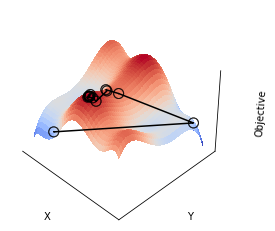

In [37]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d", "frameon": False})
fig = plt.figure(frameon=False)
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Make data.
X = np.arange(-1.9, 1.9 , 0.05)
Y = np.arange(-1.1, 1.1, 0.05)
X, Y = np.meshgrid(X, Y)
# Z = -((X**2 + Y - 11)**2+(X+Y**2-7)**2)
Z =  (4-(2.1*X**2)+(X**4)/3)*X**2 + X*Y+(-4+4*Y**2)*Y**2

# Plot the surface.
traj = np.array(hb.trajectory)
ax.plot3D(
    traj[:,0],
    traj[:,1],
    -1.0*traj[:,2],
    zorder=4.3,
    c="k"
    
)
scat = ax.scatter3D(
    traj[:,0],
    traj[:,1],
    -1.0*traj[:,2],
    color="k",
    marker="o",
    s=100,
    zorder=4.4,
    alpha=0.5
)

scat.set_facecolor('none')

surf = ax.plot_surface(
    X, 
    Y, 
    -Z,
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
    # zorder=4
    # alpha=0.2
)

# plt.axis('off')
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Remove tick laebles
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_zticklabels([])
ax.set_zticks([])

# Customize the z axis.
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Objective")

# Add a color bar which maps values to colors.
# cax = plt.axes([0.92, 0.1, 0.02, 0.8])
# fig.colorbar(surf, shrink=0.5, aspect=5, cax=cax)
ax.view_init(elev=40, azim=135)
fig.savefig("figures/local_optimzation.png", dpi=300)